In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
print('Imports complete... GET SOME')

Imports complete... GET SOME


Text(0, 0.5, 'P-Cars')

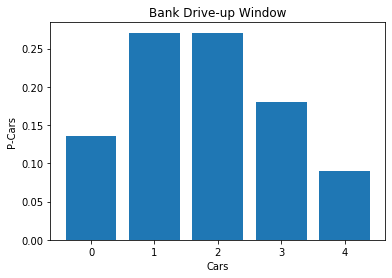

In [2]:
#A bank found that the average number of cars waiting during the noon hour at a 
#drive-up window follows a Poisson distribution with a mean of 2 cars. Make a 
#chart of this distribution and answer these questions concerning the probability
#of cars waiting at the drive-up window.

x = np.arange(0, 5)
y = stats.poisson(2).pmf(x)

plt.bar(x, y)
plt.title('Bank Drive-up Window')
plt.xlabel('Cars')
plt.ylabel('P-Cars')

In [3]:
#What is the probability that no cars drive up in the noon hour?

cars = stats.poisson(2).pmf(0)
print("The probability that no cars will drive up in the noon hour is", cars*100, "%")

#Theoretical-Simulated
carsS = np.random.poisson(2, size=10_000)
sim_cars = (carsS == 0).mean()
print('The simulated probability is', sim_cars*100, '%')

The probability that no cars will drive up in the noon hour is 13.53352832366127 %
The simulated probability is 13.780000000000001 %


In [4]:
#What is the probability that 3 or more cars come through the drive through?

cars3 = stats.poisson(2).sf(2)
print('The probability of 3 or more cars at the drive thru is', cars3*100, '%')

#Theoretical - Simulated
car3sim = (carsS >= 3).mean()
print('The simulated prob. is', car3sim*100, '%')

The probability of 3 or more cars at the drive thru is 32.33235838169365 %
The simulated prob. is 32.01 %


In [5]:
#How likely is it that the drive through gets at least 1 car?
cars1 = stats.poisson(2).sf(0)
print(cars1*100,'%')

#Theoretical - Simulated
cars1sim = (carsS >= 1).mean()
print(cars1sim*100,'%')

86.46647167633873 %
86.22 %


In [13]:
#2 Grades of State University graduates are normally distributed with a 
#mean of 3.0 and a standard deviation of .3. Calculate the following:

#What grade point average is required to be in the top 5% of the graduating class?
gpa = stats.norm(3, .3)
gpat5 = gpa.ppf(.95)
print('Top 5% Gpa is',gpat5)

#Sim
gpas = np.random.normal(3, .3, 10_000)
gpaS = np.percentile(gpas, 95)
print('Sim top 5% is',gpaS)

Top 5% Gpa is 3.4934560880854417
Sim top 5% is 3.494896505751779


In [14]:
#What GPA constitutes the bottom 15% of the class?
gpa = stats.norm(3, .3)
gpat5 = gpa.ppf(.15)
print('Bottom 15% Gpa is',gpat5)

#Sim
gpas = np.random.normal(3, .3, 10_000)
gpaS = np.percentile(gpas, 15)
print('Sim bottom 15% is',gpaS)

Bottom 15% Gpa is 2.689069983151863
Sim bottom 15% is 2.6850139724386364


In [15]:
#An eccentric alumnus left scholarship money for students in
#the third decile from the bottom of their class. Determine the 
#range of the third decile. Would a student with a 2.8 grade point 
#average qualify for this scholarship?
top = gpa.ppf(.29)
bottom = gpa.ppf(.20)
print('GPAs between', bottom, 'and', top, 'are eligible for this scholarship')

#sim
gpas = np.random.normal(3, .3, 100000)
tops = np.percentile(gpas, 29)
bots = np.percentile(gpas, 20)
print(f'Highest GPA in 3rd decile is {tops}')
print(f'Lowest GPA in 3rd decile is {bots}')
#Would a student with a 2.8 grade point average qualify for this scholarship?
#yes

GPAs between 2.7475136299281258 and 2.8339845841332982 are eligible for this scholarship
Highest GPA in 3rd decile is 2.835628384106294
Lowest GPA in 3rd decile is 2.7487236023173605


In [17]:
#If I have a GPA of 3.5, what percentile am I in?
gpa.cdf(3.5)

#sim
(gpas<=3.5).mean()

0.95203

In [19]:
#3 A marketing website has an average click-through rate of 2%. 
#One day they observe 4326 visitors and 97 click-throughs. How 
#likely is it that this many people or more click through?
p = .02
n = 4326
stats.binom(n, p).sf(96)

#sim
(np.random.choice([1, 0], p=[.02, .98], size=(10_000, 4326)).sum(axis=1) >= 97).mean()

0.1333

In [21]:
#4 You are working on some statistics homework consisting of 100 
#questions where all of the answers are a probability rounded 
#to the hundreths place. Looking to save time, you put down 
#random probabilities as the answer to each question.
#What is the probability that at least one of your first 60 
#answers is correct?
p = .01
n = 60

stats.binom(n, p).sf(0)

#sim alt
(np.random.uniform(size=(10000, 60)).round(2) == 0.34).any(axis=1).mean()

(np.random.uniform(size=(10000, 60)).round(2) == np.random.uniform(size=(10000, 60)).round(2)).any(axis=1).mean()

(np.random.binomial(60, .01, 100000) > 0).mean()

0.45077

In [22]:
#5 The codeup staff tends to get upset when the student break area is 
#not cleaned up. Suppose that there's a 3% chance that any one student 
#cleans the break area when they visit it, and, on any given day, 
#about 90% of the 3 active cohorts of 22 students visit the break area.

 
#All week?
p = .03
n = round(.9 * 3 * 22)

stats.binom(n, p).sf(0)
#sim
(np.random.choice([1, 0], p=[.03, .97], size=(1000, n)).sum(axis=1) > 0).mean()


0.831

In [24]:
#How likely is it that it goes two days without getting cleaned up?
1 - stats.binom(n * 2, p).sf(0)

stats.binom(n * 2, p).cdf(0)

stats.binom(n * 2, p).pmf(0)

0.02748303199257623

In [26]:
#How likely is it that the break area gets cleaned up each day? 
stats.binom(n, p).sf(0)

p_break_area_gets_cleaned_in_one_day = stats.binom(n, p).sf(0)

stats.binom(2, p_break_area_gets_cleaned_in_one_day).pmf(0)

#sim
(np.random.choice([1, 0], p=[.03, .97], size=(1000, n * 2)).sum(axis=1) == 0).mean()

0.028

In [28]:
#6 You want to get lunch at La Panaderia, but notice that the line is 
#usually very long at lunchtime. After several weeks of careful 
#observation, you notice that the average number of people in line 
#when your lunch break starts is normally distributed with a mean of 
#15 and standard deviation of 3. If it takes 2 minutes for each 
#person to order, and 10 minutes from ordering to getting your food, 
#what is the likelihood that you have at least 15 minutes left to eat 
#your food before you have to go back to class? Assume you have one 
#hour for lunch, and ignore travel time to and from La Panaderia.

# Let's use minutes for the units here, because that's ultimately what we need
mean = 15 * 2 # people times minutes to order
sd = 3 * 2 # people times minutes to order

time_for_lunch = 60
time_to_get_food = 10
time_to_eat = 15

# maximum amount of time we can wait in line
wait_time_cap = time_for_lunch - (time_to_get_food + time_to_eat)

stats.norm(mean, sd).cdf(wait_time_cap)

#sim
(np.random.normal(mean, sd, 10000) <= wait_time_cap).mean()

0.7945

In [29]:
#Connect to the employees database and find the average salary of 
#current employees, along with the standard deviation. For the 
#following questions, calculate the answer based on modeling the 
#employees salaries with a normal distribution defined by the 
#calculated mean and standard deviation then compare this answer to
#the actual values present in the salaries dataset.

import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = '''
SELECT *
FROM salaries s
WHERE emp_no IN (
    SELECT emp_no FROM dept_emp
    WHERE to_date > NOW()
) AND to_date > NOW()
'''
    
salaries = pd.read_sql(query, url)
salaries

ModuleNotFoundError: No module named 'env'

In [ ]:
mean = salaries.salary.mean()
sd = salaries.salary.std()


In [ ]:
#What percent of employees earn less than 60,000?
stats.norm(mean, sd).cdf(60000)

#sim
(salaries.salary < 60000).mean()

In [ ]:
#What percent of employees earn more than 95,000?
stats.norm(mean, sd).sf(95000)

#sim
(salaries.salary > 95000).mean()

In [ ]:
#What percent of employees earn between 65,000 and 80,000?
((salaries.salary >= 65000) & (salaries.salary <= 80000)).mean()

np.diff(stats.norm(mean, sd).cdf([65000, 80000]))


In [ ]:
#What do the top 5% of employees make?
salaries.salary.quantile(.95)

stats.norm(mean, sd).isf(.05)




In [ ]:
#Graph it
salaries.salary.plot.hist(bins=25, ec='black')
